# 1. Importo librerías

In [1]:
import category_encoders as ce

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,12.)})
sns.set_style("whitegrid")

# 2. Importo Datos

In [2]:
datos = pd.read_csv("../data/datos_limpios_sin_outliers.csv")

In [3]:
datos.sample(3)

,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento,limpieza,llegada_autonoma,ubicacion_fantastica,wifi,cocina,lavadora,aire,secador,frigorifico,ciudad,nombre,urls
1758,6,2,4,2,135,4.76,Alojamiento entero,Limpieza avanzada,No Llegada autónoma,Ubicación fantástica,Wifi,Cocina,Lavadora,Aire acondicionado,Secador de pelo,No Frigorífico,Valencia,Coroa del Mar. Estudio 2pax+WIFI,https://www.airbnb.es/rooms/40063257?adults=1&...
191,6,2,5,1,110,4.07,Alojamiento entero,Limpieza avanzada,Llegada autónoma,No ubicación_fantastica,No Wifi,No cocina,No lavadora,No Aire acondicionado,No Secador de pelo,No Frigorífico,Madrid,Estudio 6 /Calle Fuencarral/Chueca/Centro/ Wifi,https://www.airbnb.es/rooms/50020260?adults=1&...
69,5,2,3,1,130,4.85,Alojamiento entero,Limpieza avanzada,Llegada autónoma,No ubicación_fantastica,Wifi,Cocina,Lavadora,No Aire acondicionado,Secador de pelo,No Frigorífico,Madrid,"<<Studio Centre-Live-In-Atocha-WIFI,A/C>>",https://www.airbnb.es/rooms/46723729?adults=1&...


In [4]:
# Este código crea un df con sólo la columna precio
precio = datos[["precio_eur"]]

# 3. Transformación de variables categóricas

## 3.1 USOS - BinaryEncoder

In [5]:
#Creamos subset
numerical_usos = datos[["alojamiento", "limpieza", "llegada_autonoma", "ubicacion_fantastica", "cocina", "wifi", "lavadora", "aire", "secador", "frigorifico"]]

#Creamos objecto para binary encoding
encoder = ce.BinaryEncoder(numerical_usos,return_df=True)


In [6]:
#Fit and Transform Data 
binary_encoded = encoder.fit_transform(numerical_usos)
binary_encoded.sample(3)

,alojamiento_0,alojamiento_1,limpieza_0,limpieza_1,llegada_autonoma_0,llegada_autonoma_1,ubicacion_fantastica_0,ubicacion_fantastica_1,cocina_0,cocina_1,wifi_0,wifi_1,lavadora_0,lavadora_1,aire_0,aire_1,secador_0,secador_1,frigorifico_0,frigorifico_1
12,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0
1201,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1
1401,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,1


In [7]:
df = binary_encoded[["alojamiento_1", "limpieza_1", "llegada_autonoma_1", "ubicacion_fantastica_1", "cocina_1", "wifi_1", "lavadora_1", "aire_1", "secador_1", "frigorifico_1"]]


In [8]:
df.columns = ["alojamiento_entero", "limpieza", "llegada_autonoma", "ubicacion_fantastica", "cocina", "wifi", "lavadora", "aire_acondicionado", "secador", "frigorifico"]


In [9]:
df.sample(3)

,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
776,1,1,1,1,1,1,0,0,1,1
512,1,0,1,0,1,1,0,1,1,1
1406,1,1,1,0,1,1,0,1,1,1


## 3.2 Categorías - get_dummies

In [10]:
"""
numerical_dummies = pd.get_dummies(datos, columns=["huespedes", "dormitorios", "camas", "baños"])
numerical_dummies.head()
"""

'\nnumerical_dummies = pd.get_dummies(datos, columns=["huespedes", "dormitorios", "camas", "baños"])\nnumerical_dummies.head()\n'

In [11]:
#numerical_dummies.columns

In [12]:
"""
numerical = numerical_dummies[['precio_eur', 'valoracion', 'huespedes_1',
       'huespedes_2', 'huespedes_3', 'huespedes_4', 'huespedes_5',
       'huespedes_6', 'huespedes_7', 'dormitorios_0', 'dormitorios_1',
       'dormitorios_2', 'dormitorios_3', 'dormitorios_4', 'camas_1', 'camas_2',
       'camas_3', 'camas_4', 'camas_5', 'camas_6', 'baños_1', 'baños_2',
       'baños_3', 'baños_4']]
"""

"\nnumerical = numerical_dummies[['precio_eur', 'valoracion', 'huespedes_1',\n       'huespedes_2', 'huespedes_3', 'huespedes_4', 'huespedes_5',\n       'huespedes_6', 'huespedes_7', 'dormitorios_0', 'dormitorios_1',\n       'dormitorios_2', 'dormitorios_3', 'dormitorios_4', 'camas_1', 'camas_2',\n       'camas_3', 'camas_4', 'camas_5', 'camas_6', 'baños_1', 'baños_2',\n       'baños_3', 'baños_4']]\n"

# 4. Concat de csv

In [13]:
categorias = datos[["huespedes", "dormitorios", "camas", "baños", "precio_eur", "valoracion"]]

In [14]:
#Este código junta las nuevas variables de usos en código binario con el df total de variables = categorías
concatenated = pd.concat([categorias, df], axis=1)

In [15]:
#Este código junta las nuevas variables de usos en código binario con el df del precio
#precio_binary = pd.concat([precio, df], axis=1)

In [16]:
concatenated.sample(3)

,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
588,6,3,4,1,95,4.77,1,1,0,1,1,1,0,1,1,0
567,2,1,1,1,60,4.60,1,1,1,0,1,1,0,1,1,0
1855,2,1,1,1,35,4.73,0,1,1,0,1,1,0,0,0,1


In [17]:
concatenated

,huespedes,dormitorios,camas,baños,precio_eur,valoracion,alojamiento_entero,limpieza,llegada_autonoma,ubicacion_fantastica,cocina,wifi,lavadora,aire_acondicionado,secador,frigorifico
0,2,1,2,1,55,4.90,1,1,1,1,1,1,1,1,1,1
1,6,3,4,2,99,4.40,1,0,1,0,1,1,0,1,1,1
2,5,2,4,1,83,4.52,1,1,1,0,0,0,1,0,0,1
3,2,1,1,1,60,4.80,1,1,1,1,0,0,1,0,0,1
4,5,3,3,1,50,4.84,1,1,1,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,4,1,2,1,75,4.50,1,0,1,1,0,1,1,1,0,0
2333,2,1,1,1,51,4.86,1,1,1,1,0,1,0,1,1,1
2334,4,0,1,1,59,4.50,1,1,0,1,1,1,0,1,0,1
2335,2,0,1,1,70,4.65,1,1,1,0,1,1,0,1,0,1


In [18]:
concatenated.dtypes

huespedes                 int64
dormitorios               int64
camas                     int64
baños                     int64
precio_eur                int64
valoracion              float64
alojamiento_entero        int64
limpieza                  int64
llegada_autonoma          int64
ubicacion_fantastica      int64
cocina                    int64
wifi                      int64
lavadora                  int64
aire_acondicionado        int64
secador                   int64
frigorifico               int64
dtype: object

In [19]:
#concatenated.to_csv("../data/datos_numericos_limpios.csv", index=False)

In [20]:
concatenated.to_csv("../data/datos_numericos_limpios_sin_outliers.csv", index=False)

# 4. Análisis de correlación

In [21]:
corr = concatenated.corr()

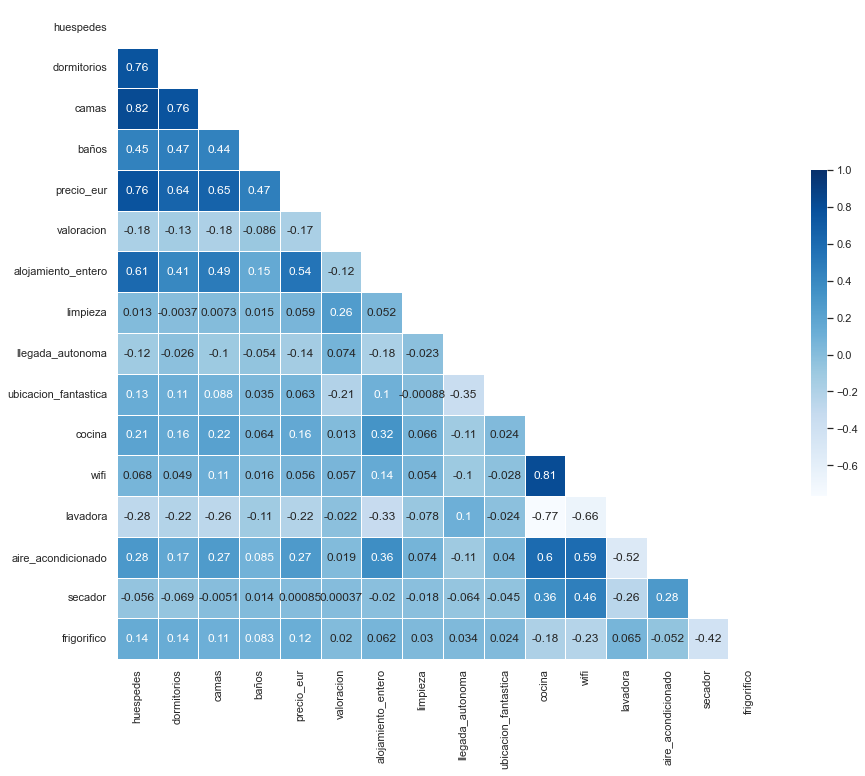

In [22]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap="Blues",
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);